In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from datetime import time

sns.set()
%matplotlib inline


#Load the data. ( This file use simplified data "Simplified_Citation_After_2015July_to_2019.csv"

In [2]:
#using relative path to import csv file.
#for Mac users, please remove double dots. This relative path is written in Windows 10 os.
df = pd.read_csv("..\data\Simplified_Citation_After_2015July_to_2019.csv")
df.head()

,Unnamed: 0,Ticket number,Issue Date,Issue time,Meter Id,Marked Time,RP State Plate,VIN,Make,Body Style,Color,Location,Route,Agency,Violation code,Violation Description,Fine amount,Latitude,Longitude
0,28,4361326712,2019/09/17 12:00:00 AM,1205.0,NaN,NaN,CA,NaN,TOYT,PA,GY,309 WINDWARD AVE,00163,51.0,80.69BS,NO PARK/STREET CLEAN,73.0,6.419487e+06,1.818861e+06
1,112,4361286823,2019/09/17 12:00:00 AM,853.0,NaN,NaN,CA,NaN,TOYT,PA,WT,934 84TH ST W,00553,55.0,80.69BS,NO PARK/STREET CLEAN,73.0,6.473690e+06,1.808839e+06
2,224,4361159515,2019/09/17 12:00:00 AM,833.0,NaN,NaN,CA,NaN,NISS,PA,WT,2601 MONMOUTH AVE,00536,55.0,80.69BS,NO PARK/STREET CLEAN,73.0,6.475329e+06,1.834194e+06
3,473,4361237226,2019/09/17 12:00:00 AM,1015.0,NaN,NaN,CA,NaN,HOND,PA,RD,615 HAMPTON DR,00133,51.0,80.69BS,NO PARK/STREET CLEAN,73.0,6.417752e+06,1.820642e+06
4,592,4360129196,2019/09/17 12:00:00 AM,1007.0,NaN,NaN,CA,NaN,VOLV,PA,SL,1346 MCCADDEN PL N,00487,54.0,80.69BS,NO PARK/STREET CLEAN,73.0,6.459495e+06,1.857205e+06


#Analsysis of Parking Citations All 

In [3]:
#Have a look at the numericals of the data
df.describe()


,Unnamed: 0,Ticket number,Issue time,Marked Time,VIN,Agency,Fine amount,Latitude,Longitude
count,8.755400e+04,8.755400e+04,87539.000000,2806.000000,0.0,87554.000000,87502.000000,8.755400e+04,8.755400e+04
mean,4.358450e+06,4.141587e+09,1193.511007,1052.229152,NaN,52.003952,70.194316,5.627043e+06,1.620545e+06
std,2.515523e+06,7.158483e+08,475.233027,238.409221,NaN,9.335395,32.052942,2.140339e+06,5.893937e+05
min,2.800000e+01,1.006079e+09,1.000000,2.000000,NaN,1.000000,10.000000,9.999900e+04,9.999900e+04
25%,2.182563e+06,4.281948e+09,906.000000,904.000000,NaN,51.000000,63.000000,6.423939e+06,1.826009e+06
50%,4.357787e+06,4.308346e+09,1148.000000,1035.000000,NaN,54.000000,68.000000,6.453559e+06,1.842359e+06
75%,6.532856e+06,4.332527e+09,1459.000000,1200.000000,NaN,55.000000,73.000000,6.475587e+06,1.858205e+06
max,8.706345e+06,4.361364e+09,2359.000000,2335.000000,NaN,58.000000,363.000000,6.513150e+06,1.941866e+06


In [4]:
#check each data type
df.dtypes

Unnamed: 0                 int64
Ticket number              int64
Issue Date                object
Issue time               float64
Meter Id                  object
Marked Time              float64
RP State Plate            object
VIN                      float64
Make                      object
Body Style                object
Color                     object
Location                  object
Route                     object
Agency                   float64
Violation code            object
Violation Description     object
Fine amount              float64
Latitude                 float64
Longitude                float64
dtype: object

In [5]:
#inspect how many null values each column might have
df.apply(lambda x: sum(x.isna()),axis = 0)

Unnamed: 0                   0
Ticket number                0
Issue Date                   0
Issue time                  15
Meter Id                 65438
Marked Time              84748
RP State Plate               2
VIN                      87554
Make                        71
Body Style                 115
Color                       25
Location                     2
Route                      636
Agency                       0
Violation code               0
Violation Description        5
Fine amount                 52
Latitude                     0
Longitude                    0
dtype: int64

Feature Engineering

In [6]:
#change the datatypes 
df['Fine amount'] = pd.to_numeric(df['Fine amount'], errors="coerce") #change string to float
df['Issue Date'] = pd.to_datetime(df['Issue Date']) #change string to datetime
df['Time'] = pd.to_datetime(df['Issue time'], format= '%H%M', errors= "coerce").dt.time #change time in new column

In [7]:
#split data into metered and non metered  
temp = {True:'Meter', False : 'No Meter'}
df['Meter']= (df['Meter Id'].notna()).map(temp)
 
#create an hour feature
df['Hour'] = df['Time'].apply(lambda x: x.hour) 

#create day of the week
weekdays=('Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday')
df['Weekday'] = df['Issue Date'].apply(lambda x : weekdays[x.weekday()])

In [8]:
df['Year'] = df['Issue Date'].apply(lambda x : x.year)
df['Month'] = df['Issue Date'].apply(lambda x : x.month)


In [9]:
#remove columns with too many none entries. 
del df['VIN']
del df['Marked Time']
#remove the columns that I don't think are neccessary for this analysis
df= df.drop(["Ticket number","Issue time",	"Meter Id",	"RP State Plate",	"Make",	"Body Style",	"Color","Route",	"Agency",	"Latitude",	"Longitude"], axis = 1)
df.head()

,Unnamed: 0,Issue Date,Location,Violation code,Violation Description,Fine amount,Time,Meter,Hour,Weekday,Year,Month
0,28,2019-09-17,309 WINDWARD AVE,80.69BS,NO PARK/STREET CLEAN,73.0,12:05:00,No Meter,12.0,Tuesday,2019,9
1,112,2019-09-17,934 84TH ST W,80.69BS,NO PARK/STREET CLEAN,73.0,08:53:00,No Meter,8.0,Tuesday,2019,9
2,224,2019-09-17,2601 MONMOUTH AVE,80.69BS,NO PARK/STREET CLEAN,73.0,08:33:00,No Meter,8.0,Tuesday,2019,9
3,473,2019-09-17,615 HAMPTON DR,80.69BS,NO PARK/STREET CLEAN,73.0,10:15:00,No Meter,10.0,Tuesday,2019,9
4,592,2019-09-17,1346 MCCADDEN PL N,80.69BS,NO PARK/STREET CLEAN,73.0,10:07:00,No Meter,10.0,Tuesday,2019,9


Text(0.5, 1, 'Number of Parking Citations per Metered Parking')

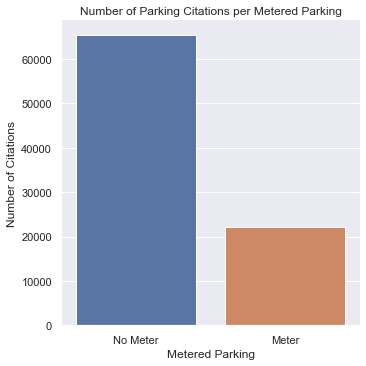

In [10]:
sns.catplot('Meter', data=df, kind = 'count')
plt.ylabel('Number of Citations')
plt.xlabel('Metered Parking')
plt.title('Number of Parking Citations per Metered Parking')

Text(0.5, 1, 'Number of Parking Citations per Hour')

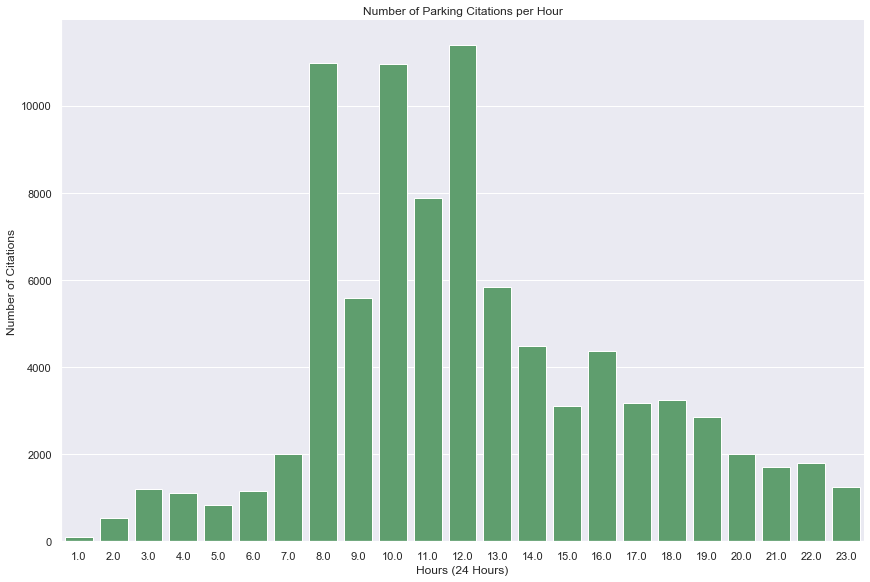

In [9]:
sns.catplot('Hour', data=df, kind = 'count', color = 'g', height=8, aspect=12/8)
plt.ylabel('Number of Citations')
plt.xlabel('Hours (24 Hours)')
plt.title('Number of Parking Citations per Hour')

Text(0.5, 1, 'Number of Metered Parking Citations per Hour')

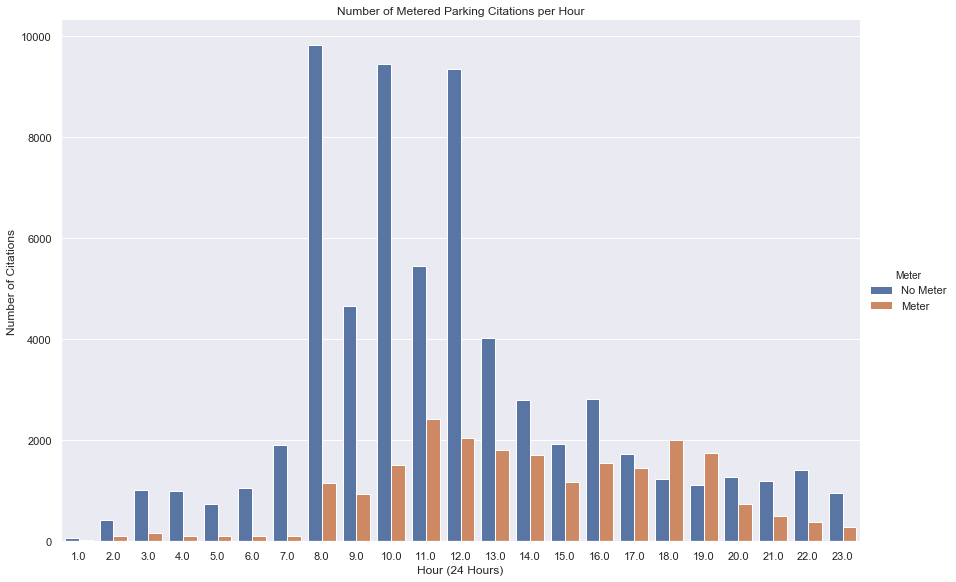

In [10]:
sns.catplot('Hour', data = df, kind = 'count', hue = 'Meter', height=8, aspect=12/8)
plt.ylabel('Number of Citations')
plt.xlabel('Hour (24 Hours)')
plt.title('Number of Metered Parking Citations per Hour')

Text(0.5, 1, 'Number of Parking Citations per Weekday')

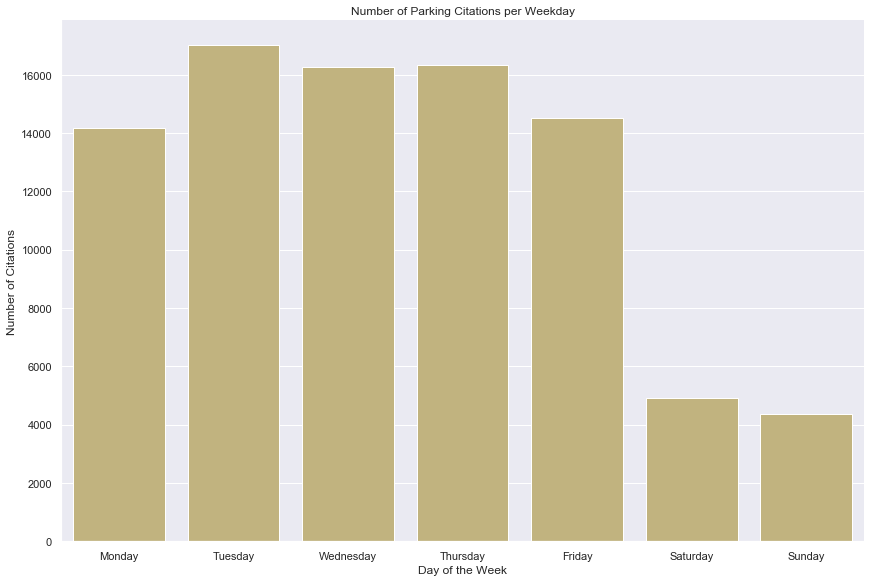

In [11]:
sns.catplot('Weekday', data=df, kind = 'count', color ='y', order = weekdays, height=8, aspect=12/8)
plt.ylabel('Number of Citations')
plt.xlabel('Day of the Week')
plt.title('Number of Parking Citations per Weekday')

Text(0.5, 1, 'Number of Parking Citations per Fine')

<Figure size 720x288 with 0 Axes>

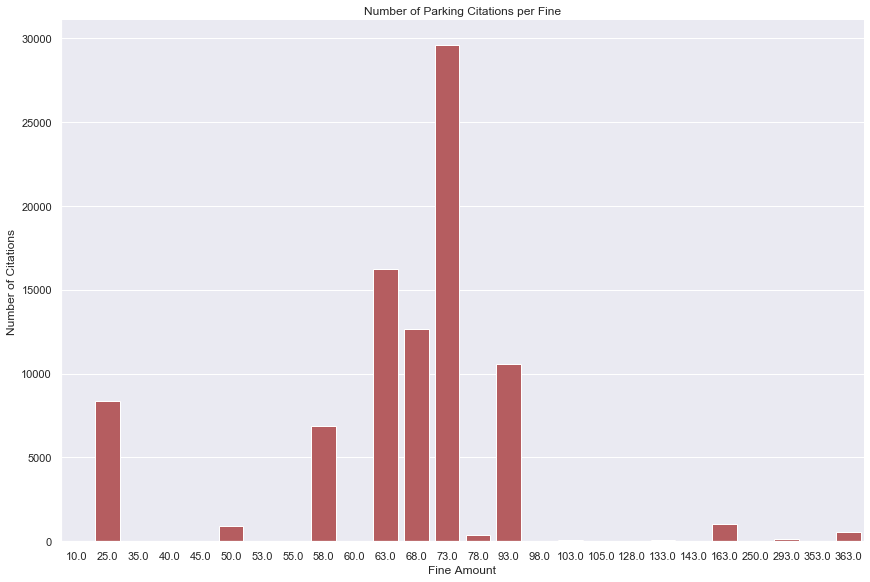

In [12]:
plt.figure(figsize = (10,4))
sns.catplot('Fine amount', data = df, kind = 'count' ,color = 'r', height=8, aspect=12/8)
plt.ylabel('Number of Citations')
plt.xlabel('Fine Amount')
plt.title('Number of Parking Citations per Fine')

Text(0.5, 1.0, 'LA Parking Citations Timeline')

<Figure size 1800x720 with 0 Axes>

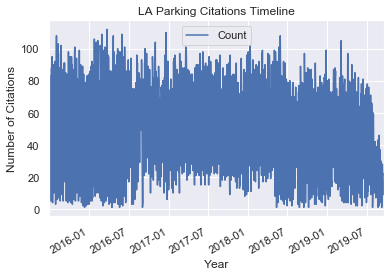

In [13]:
date = df.groupby('Issue Date')['Issue Date'].count().reset_index(name = 'Count')
plt.figure(figsize=(25,10))
date.plot(x='Issue Date', y = 'Count')
plt.ylabel('Number of Citations')
plt.xlabel('Year')
plt.title('LA Parking Citations Timeline')

In [14]:
df['Violation code'].describe()

count       87554
unique        161
top       80.69BS
freq        24796
Name: Violation code, dtype: object

In [15]:
df['Violation Description'].describe()

count                    87549
unique                     181
top       NO PARK/STREET CLEAN
freq                     25567
Name: Violation Description, dtype: object

Text(0.5, 1.0, 'Top 10 Parking Violations')

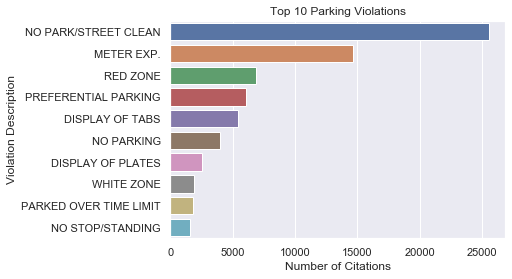

In [16]:
violations_top10 = df['Violation Description'].value_counts(ascending=False).index[:10]
sns.countplot(y="Violation Description", data=df, order= violations_top10)
plt.ylabel('Violation Description')
plt.xlabel('Number of Citations')
plt.title('Top 10 Parking Violations')

Text(0.5, 1.0, 'Top 10 Locations Where Citations Happen')

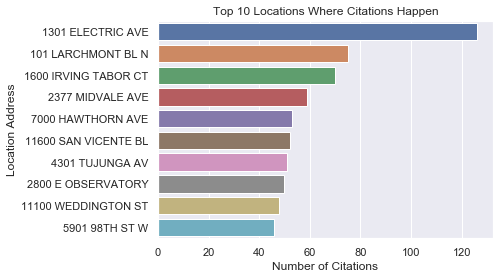

In [17]:
locations_top10 = df['Location'].value_counts(ascending=False).index[:10]
sns.countplot(y="Location", data=df, order=locations_top10)
plt.ylabel('Location Address')
plt.xlabel('Number of Citations')
plt.title('Top 10 Locations Where Citations Happen')

In [18]:
top_violations_df = df[df['Violation Description'].isin(violations_top10)]
top_violations_df.head()

,Unnamed: 0,Issue Date,Location,Violation code,Violation Description,Fine amount,Time,Meter,Hour,Weekday,Year,Month
0,28,2019-09-17,309 WINDWARD AVE,80.69BS,NO PARK/STREET CLEAN,73.0,12:05:00,No Meter,12.0,Tuesday,2019,9
1,112,2019-09-17,934 84TH ST W,80.69BS,NO PARK/STREET CLEAN,73.0,08:53:00,No Meter,8.0,Tuesday,2019,9
2,224,2019-09-17,2601 MONMOUTH AVE,80.69BS,NO PARK/STREET CLEAN,73.0,08:33:00,No Meter,8.0,Tuesday,2019,9
3,473,2019-09-17,615 HAMPTON DR,80.69BS,NO PARK/STREET CLEAN,73.0,10:15:00,No Meter,10.0,Tuesday,2019,9
4,592,2019-09-17,1346 MCCADDEN PL N,80.69BS,NO PARK/STREET CLEAN,73.0,10:07:00,No Meter,10.0,Tuesday,2019,9


Text(0.5, 1.0, 'LA Parking Citations Timeline per Violation Description')

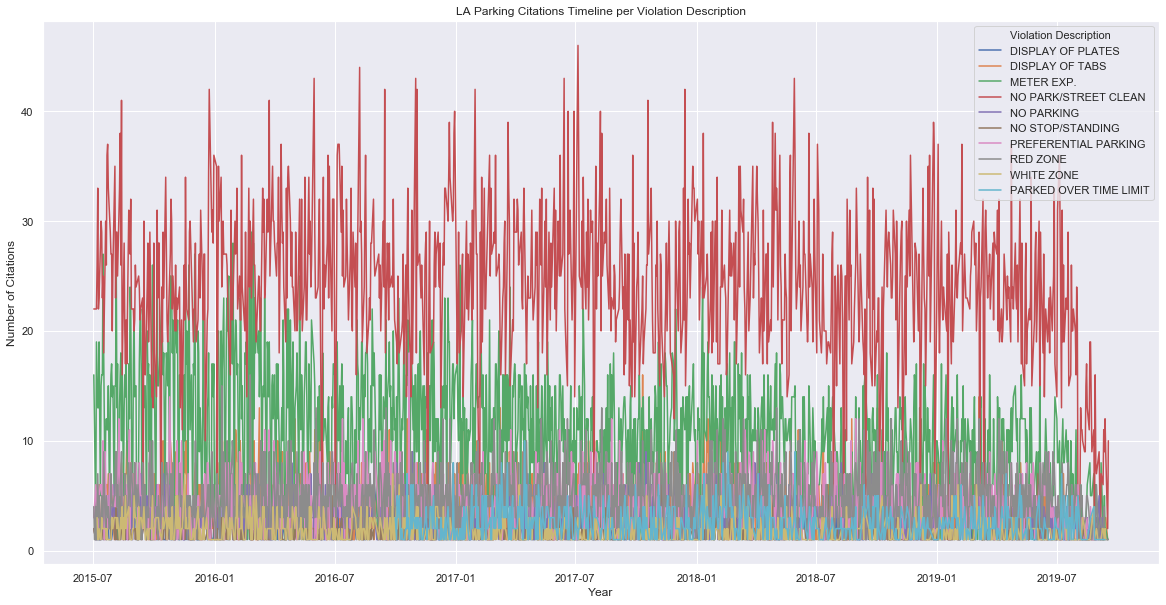

In [19]:
top_10_date = top_violations_df.groupby(['Issue Date', 'Violation Description'])['Issue Date'].count().reset_index(name = 'Count')
plt.figure(figsize=(20,10))
sns.lineplot(x='Issue Date', y= 'Count', hue= 'Violation Description', data=top_10_date)
plt.ylabel('Number of Citations')
plt.xlabel('Year')
plt.title('LA Parking Citations Timeline per Violation Description')

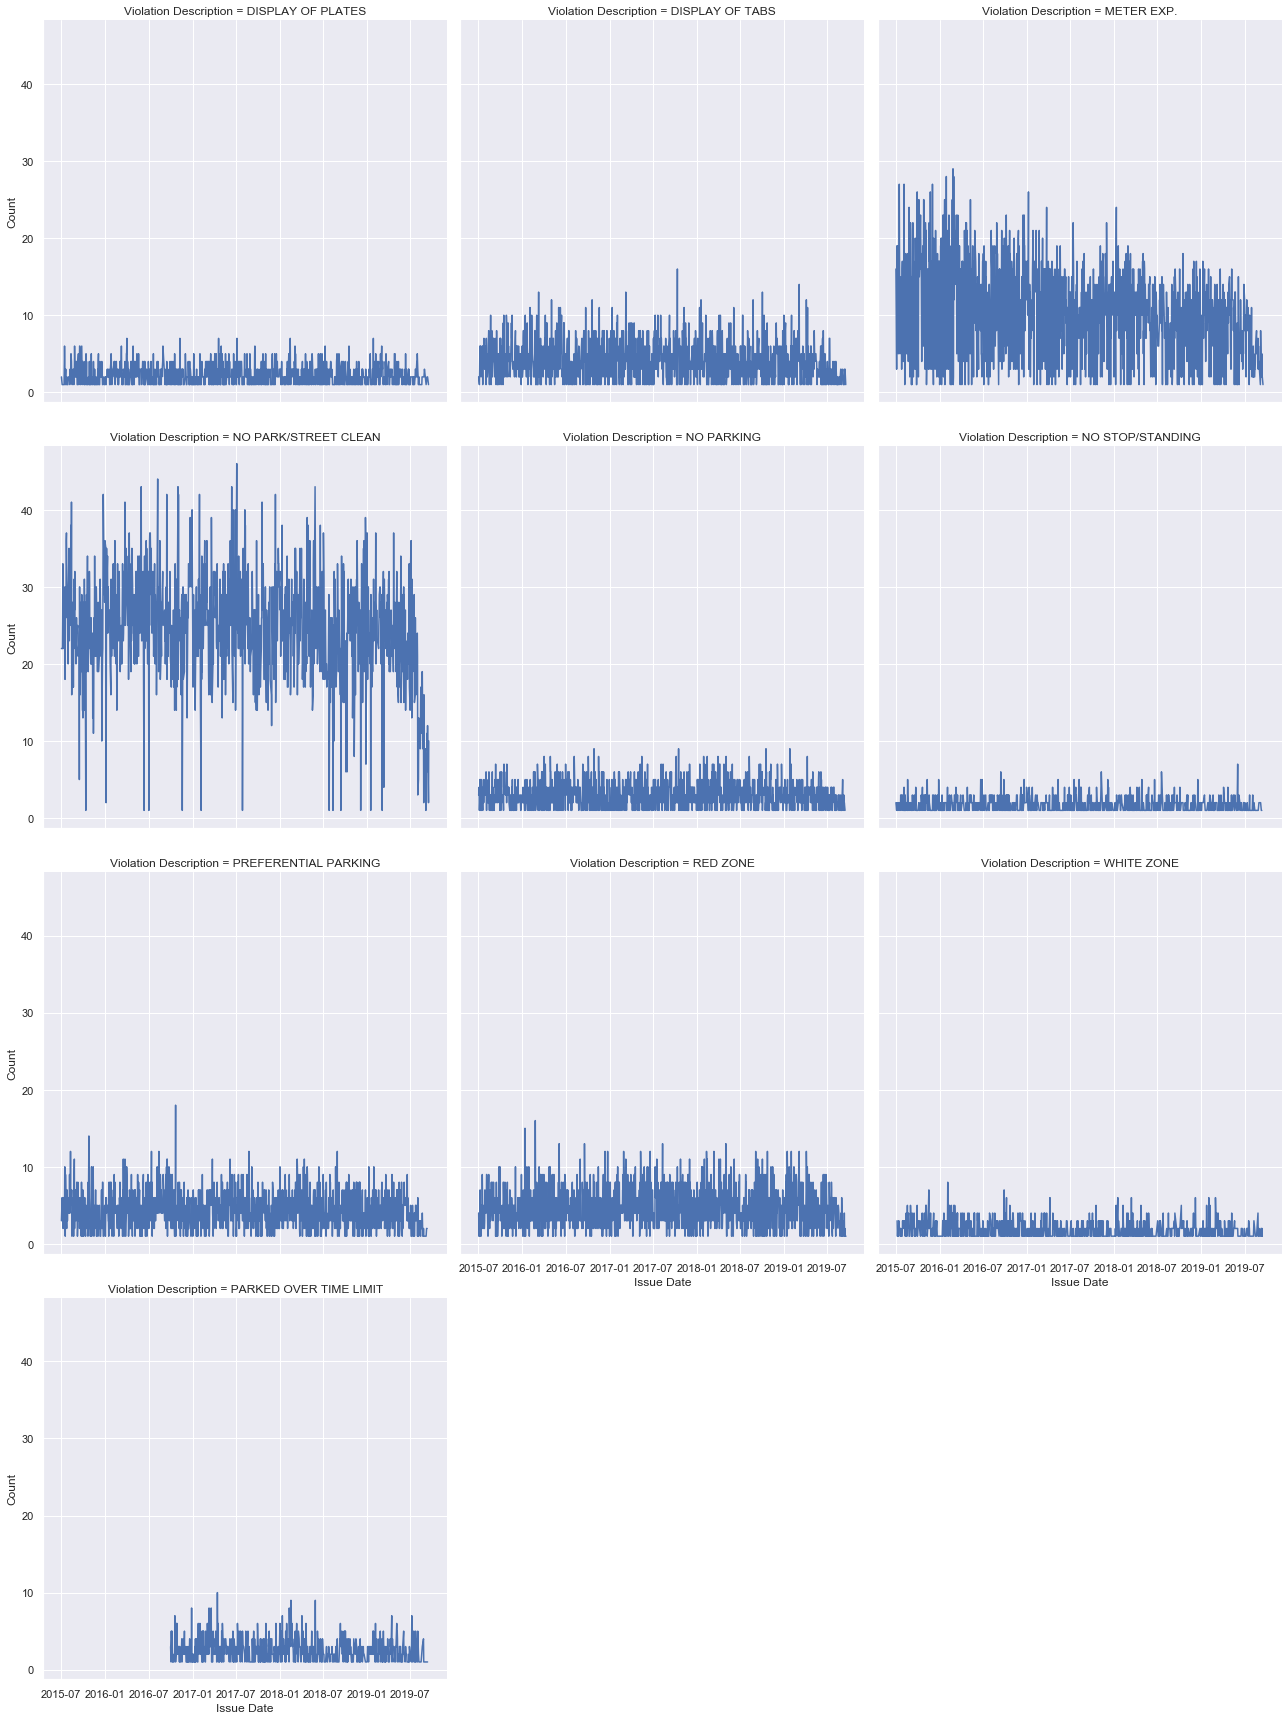

In [21]:
grid = sns.FacetGrid(data= top_10_date, col= 'Violation Description', col_wrap= 3, height=6)
grid.map(sns.lineplot, "Issue Date", "Count")

In [22]:
top_10_hour = top_violations_df.groupby(['Hour', 'Weekday','Violation Description'])['Hour'].count().reset_index(name = 'Count')
top_10_hour.head()

,Hour,Weekday,Violation Description,Count
0,1.0,Friday,DISPLAY OF TABS,2
1,1.0,Friday,NO PARKING,1
2,1.0,Friday,PREFERENTIAL PARKING,5
3,1.0,Friday,WHITE ZONE,1
4,1.0,Monday,DISPLAY OF TABS,1


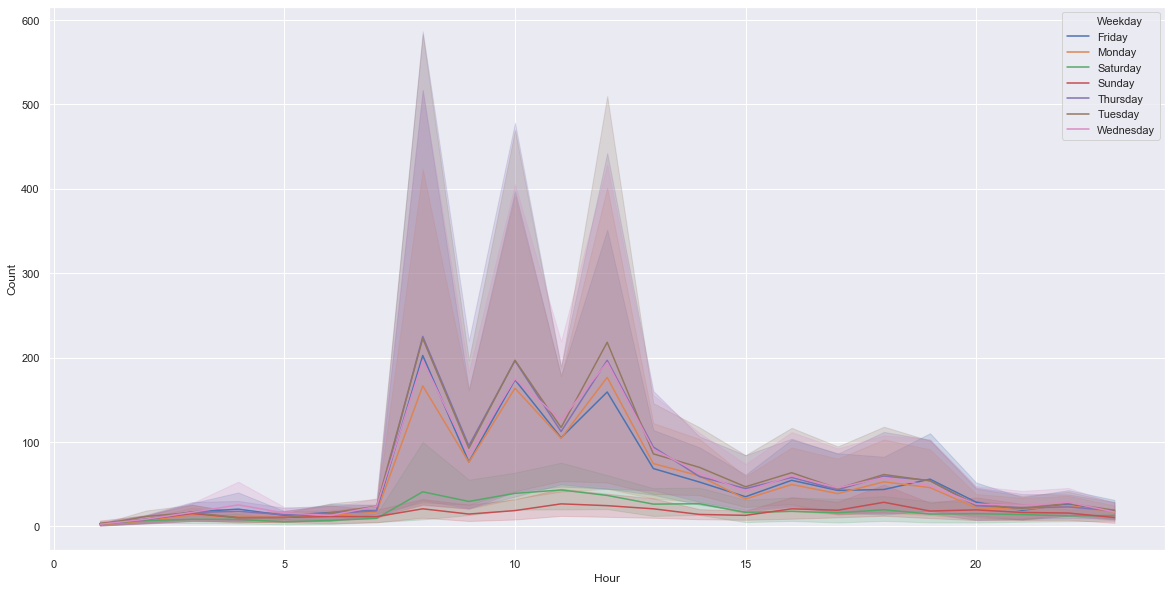

In [23]:

plt.figure(figsize=(20,10))
sns.lineplot(x='Hour', y= 'Count', hue= 'Weekday', data=top_10_hour)

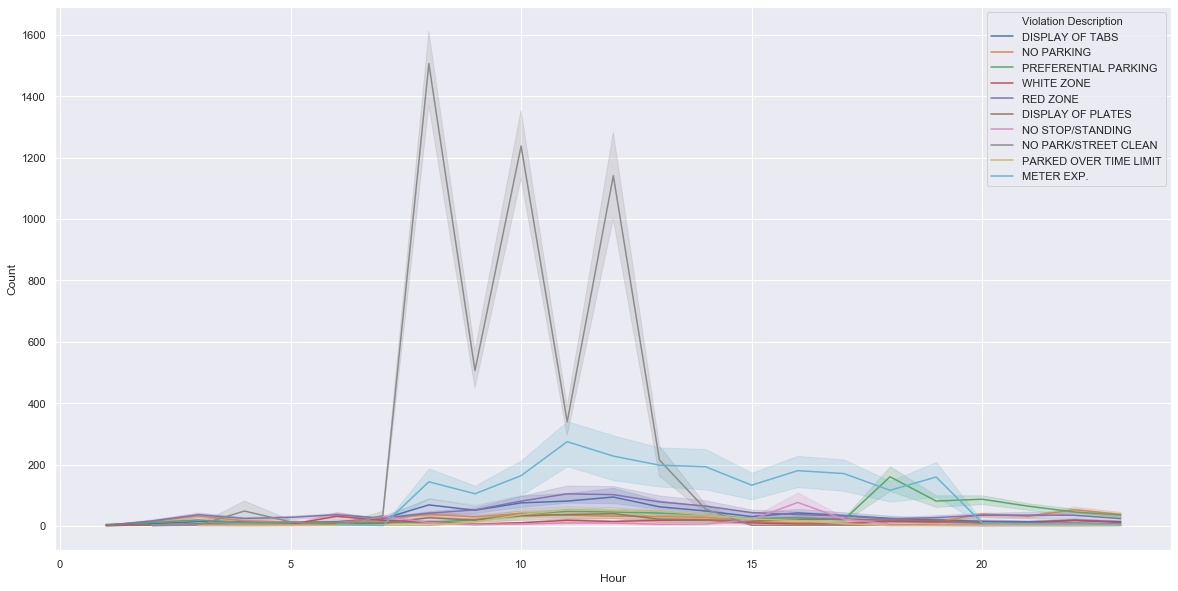

In [24]:
plt.figure(figsize=(20,10))
sns.lineplot(x='Hour', y= 'Count', hue= 'Violation Description', data=top_10_hour)

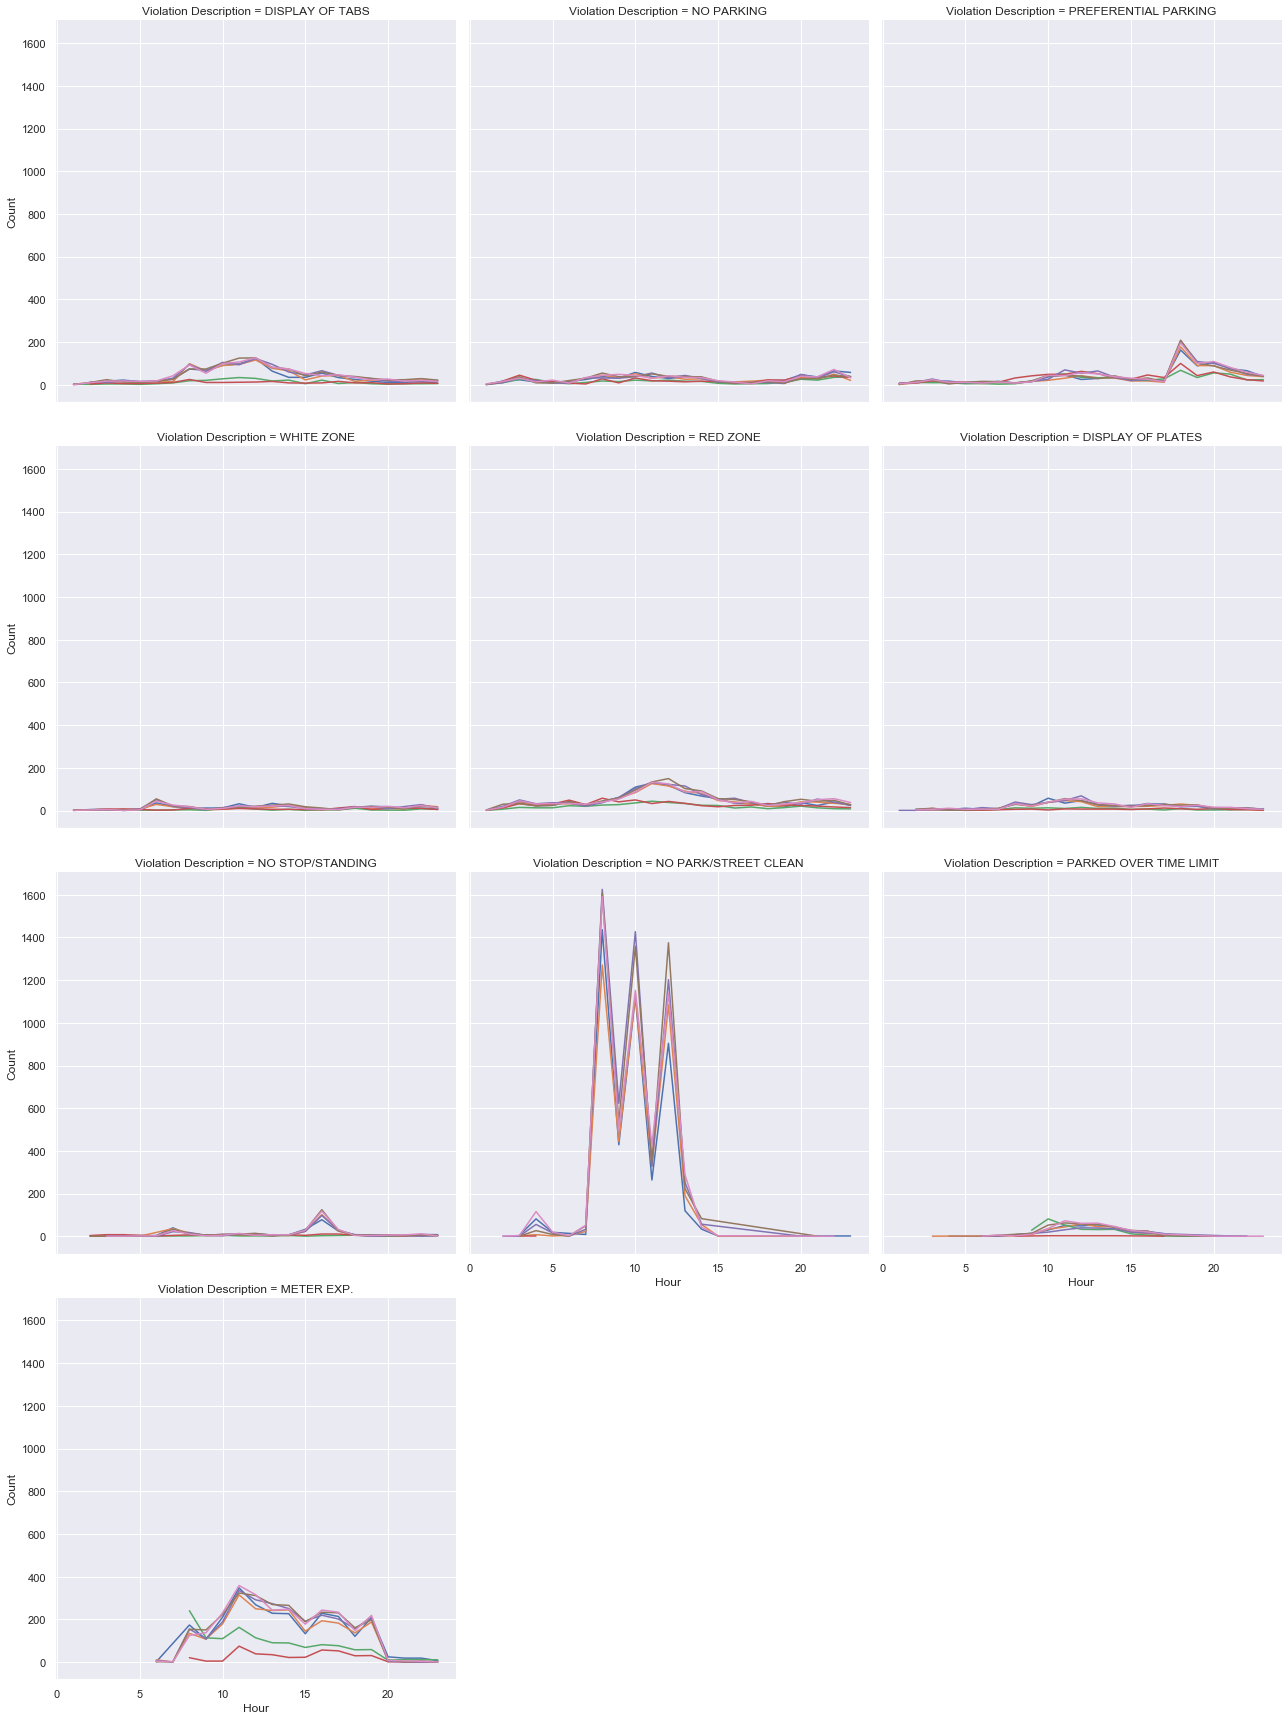

In [25]:
grid = sns.FacetGrid(data= top_10_hour, hue='Weekday', col= 'Violation Description', col_wrap= 3, height=6)
grid.map(sns.lineplot, "Hour", "Count")